# Mackoy & Sarah Project Title Here 
## Sub Heading Here 
### Description of Project (Goals, Stakes, Summarize Findings Here) 

In [9]:
# NOTE TO SELVES 
"""
stake holder: residential real estate 
we can fram our analysis around pitching high end house vs. middle class housing 
PRICE WILL ALWAYS BE OUR DEPENDENT VARI 
indepentdent variables include but are not limitied  to: waterfront, beds & baths, grade (sarah loves zipcodes so i can experiment with those on my own <3)

        2015 is our most recent year, our data just covers 1 year p  much 2014-2015
        
9/11 update: price, sqft_living, zipcode, living15, lot15, bedrooms, bathrooms, floors, keep condition & grade,  yr_built 

we can feature engineer a bedroom/bathroom ratio 


"divising a model that can help predict purchase price based on the attributes of the home --> so firms can better prepare their client for the pre-approval process"

Stakeholder
A Real Estate Company
Business problem
Devising a model that can help predict purchase price according to attributes of a home.
This way they can prepare their clients early on for what pre-approval amount they need.
EDA
Removed Nulls
Filled in empty values with unknown
Removed columns that didn’t have information we would use.
Removed outliers through 3 standard deviations.
For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation. It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold. all(axis=1) ensures that for each row, all column satisfy the constraint. Finally, the result of this condition is used to index the dataframe.
First simple model
Created a simple model based on price and square foot as that had the highest correlation.
Modeling process
Still honing in on what predictors to use for our multilinear regression.
Need to make sure we check the assumptions before finalizing this.

"""

'\nstake holder: residential real estate \nwe can fram our analysis around pitching high end house vs. middle class housing \nPRICE WILL ALWAYS BE OUR DEPENDENT VARI \nindepentdent variables include but are not limitied  to: waterfront, beds & baths, grade (sarah loves zipcodes so i can experiment with those on my own <3)\n\n        2015 is our most recent year, our data just covers 1 year p  much 2014-2015\n        \n9/11 update: price, sqft_living, zipcode, living15, lot15, bedrooms, bathrooms, floors, keep condition & grade,  yr_built \n\nwe can feature engineer a bedroom/bathroom ratio \n\n\n"divising a model that can help predict purchase price based on the attributes of the home --> so firms can better prepare their client for the pre-approval process"\n\n'

# Importing Necessary Libraries & Loading Data

In [2]:
#importing libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from scipy import stats

In [3]:
import pandas as pd

data = pd.read_csv('data/kc_house_data.csv')
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

# Data Exploration

In [4]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [5]:
#check for missing data 
data.info()
#waterfront missing 2,376
#view missing 63 values
#year reno missing 3,842


# date is an object --> put that into date time 
# sqft_basement is an object --> put that into numeric & there aree also missing valyes (bc there is no basement)
#whats up with year reno 
#water front has missing too 
# we can dummy: 
    # water front 
    # condition 
    # grade
    # zipcode 
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#NULLS 
# water front had 19221/21597
# view has 21534 / 21597 --> 19422 had "none" for view; only 2,112 values had a view 
# yr_reno had 117755/21597
data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [7]:
# looking at correlations 

potential_corrs = data.corr()['price'].map(abs).sort_values(ascending=False)
potential_corrs

#looks like: price & sqft_living has the biggest impact also sqft_above, bathroom is p good 

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

#  Data Cleaning Here 

In [39]:
# lets start cleaning! get your mop & broom! 

#make a copy of the dataset, we never want to overwrite our OG data 
df = data.copy()
# pull out grade code 
df['grade_num'] = data['grade'].map(lambda x:x.split(' ', 1)[0])
#bed bath ratio 
df['bed_bath_ratio'] = df['bedrooms']/df['bathrooms']
#dropping unnecessary columns: give reasons for why 
df = df.drop(columns = ['sqft_basement', 'yr_renovated', 'lat', 'long', 'view', 'condition','grade', 'date'])


#let's dummy variable for city --> 1 for in city of seatlle, 0 for outside of city limits 
#creating a list of zipcodes thar are IN the city limits of seatlle
zip_city_list = [98101, 98177, 98133, 98155, 98125, 98117, 98103, 98107, 98105, 98195, 98199, 98119, 98109, 98102, 98112, 98121, 98122, 98104, 98134, 98144, 98136, 98126, 98106, 98108, 98118, 98146, 98178]
#if it is within our city limits give it a 1,without give it 0 
df['zip_city'] = np.where(df['zipcode'].isin(zip_city_list),1,0)



#let's dummy waterfront 
# assumotion: ATM it's that it's unknown 
    #NaN meaning?--> express this as a % of missing --> report this as a data limitation; llimitations might be that some of the nans might have unreported waterfronts, based off this analyssis we will do --> we could do a ttest with a random sample of Nans and see how mnay of them do have a water front --> we have this % certainty that these nans are nos
df['waterfront'] = df['waterfront'].fillna("Unknown")
#getting dummy variables for waterfront 0= no water, 1 = yes
df1 = pd.get_dummies(df['waterfront'])
#adding dummies into a main dataframe 
main_df = pd.concat([df, df1], axis=1)
#cleaning up the columns so that we have a cleam copy
main_df['Waterfront'] = main_df['YES'].copy()
#dropping unneeded columns 
main_df = main_df.drop(columns = ['NO', 'Unknown', 'YES', 'waterfront', 'zipcode', 'yr_built'])
#store the mean of price because that is the best predictor 
mean_price = main_df['price'].mean()
main_df['mean_price'] = main_df['price'].mean()


"""
dropping basement bc there was a lot of missing --> put in that metric
dropping reno bc there was a lot missing --> put in that metric 
dropping lat & long bc we don't need them --> going with zipcode; bc of redudancy --> 3 variables capture 1 
dropping view with none & view doesn't really mean anything --> find the breakdown % of homes that have views and waterfronts --> view might mean something in terms of price --> are water front and view multicol
dropping condition bc a lack of spread --> put metric in here
drop sqftbasement bc of too many missing values & lack of data sic 
"""

main_df.info()
#print(mean_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   sqft_above      21597 non-null  int64  
 8   sqft_living15   21597 non-null  int64  
 9   sqft_lot15      21597 non-null  int64  
 10  grade_num       21597 non-null  object 
 11  bed_bath_ratio  21597 non-null  float64
 12  zip_city        21597 non-null  int64  
 13  Waterfront      21597 non-null  uint8  
 14  mean_price      21597 non-null  float64
dtypes: float64(5), int64(8), object(1), uint8(1)
memory usage: 2.3+ MB


In [38]:
main_df.head()

id        price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 221900.00000         3    1.00000         1180      5650   
1  6414100192 538000.00000         3    2.25000         2570      7242   
2  5631500400 180000.00000         2    1.00000          770     10000   
3  2487200875 604000.00000         4    3.00000         1960      5000   
4  1954400510 510000.00000         3    2.00000         1680      8080   

   floors  sqft_above  yr_built  sqft_living15  sqft_lot15 grade_num  \
0 1.00000        1180      1955           1340        5650         7   
1 2.00000        2170      1951           1690        7639         7   
2 1.00000         770      1933           2720        8062         6   
3 1.00000        1050      1965           1360        5000         7   
4 1.00000        1680      1987           1800        7503         8   

   bed_bath_ratio  zip_city  Waterfront   mean_price  
0         3.00000         1           0 540296.57351  
1         1.33333         1           0 540296.57351  
2         2.00000         0           0 540296.57351  
3         1.33333         1           0 540296.57351  
4         1.50000         0           0 540296.57351

In [41]:
#remove outliers THIS. IS. THE. CORRECT. CODE (we hope)

#make a copy of the clean dataframe 
no_out = main_df.copy()

#drop columns that we cannot use 
no_out = no_out.drop(columns= ['id', 'zip_city', 'Waterfront'], axis=1)

#change data type so that we can math 
no_out = no_out.astype('float')

#pull out the columns 
columns = no_out.columns

#for each column in the dataframe, get the mean and standard deviation 
#then get the z-score for within 3 standard devaitions
for col in columns:
        
        mean = no_out[col].mean()
        sd = no_out[col].std()
        
        no_out = no_out[(no_out[col] <= mean+(3*sd))]
        
pd.set_option('display.float_format', lambda x: '%.5f' % x)
no_out.info()


#part of this loop is courtesy of Stephen Allwright 

#https://stephenallwright.com/remove-outliers-pandas/




<class 'pandas.core.frame.DataFrame'>
Int64Index: 19479 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           19479 non-null  float64
 1   bedrooms        19479 non-null  float64
 2   bathrooms       19479 non-null  float64
 3   sqft_living     19479 non-null  float64
 4   sqft_lot        19479 non-null  float64
 5   floors          19479 non-null  float64
 6   sqft_above      19479 non-null  float64
 7   sqft_living15   19479 non-null  float64
 8   sqft_lot15      19479 non-null  float64
 9   grade_num       19479 non-null  float64
 10  bed_bath_ratio  19479 non-null  float64
 11  mean_price      19479 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


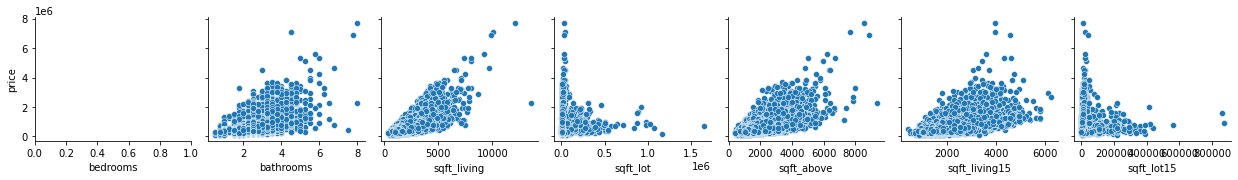

In [43]:
#vis of clean_df 
# pair plot vis
sns.pairplot(main_df, x_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15',
                          'sqft_lot15'], y_vars = ['price'])
plt.show()

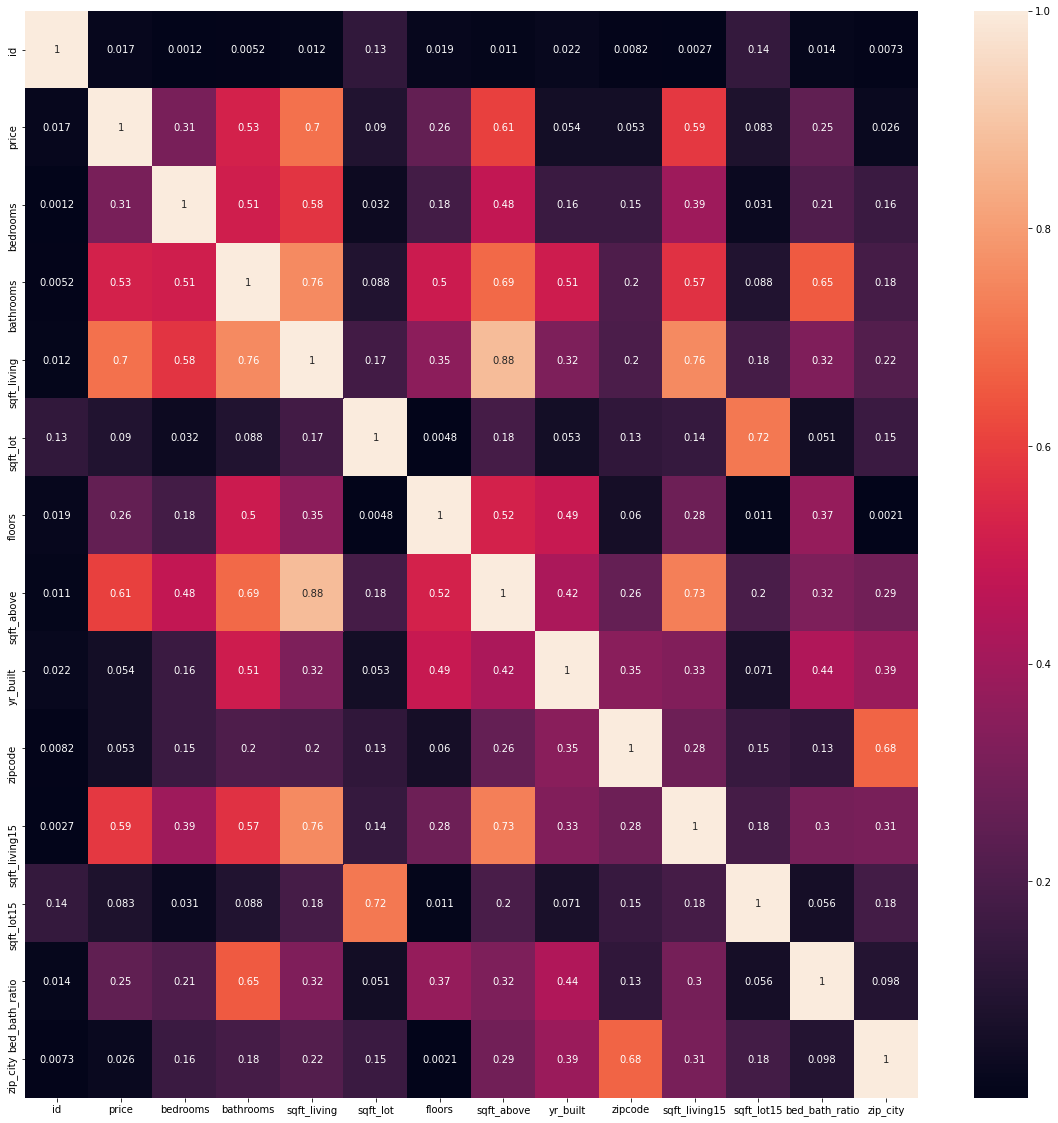

In [44]:
#vis of clean_df
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

In [45]:
#add the no_out data back into the full clean dataframe 

not_out = main_df.copy()

#drop the columns that we have cleaned for outliers 
not_out = not_out.drop(columns= ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'grade_num', 'bed_bath_ratio','mean_price'], axis=1)

#add the outliers & no-outlier data frames together so that we have all our columns again 
clean_df = pd.concat([no_out, not_out], axis=1)

#drop the null values (for the columns that we did not do the outlier math on )
clean_df = clean_df.dropna()

#check to make sure that we have all our columns with the same amount of data
clean_df.info()

#store our cleaned data as a csv file for future use
clean_df.to_csv('clean_df.csv')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19479 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           19479 non-null  float64
 1   bedrooms        19479 non-null  float64
 2   bathrooms       19479 non-null  float64
 3   sqft_living     19479 non-null  float64
 4   sqft_lot        19479 non-null  float64
 5   floors          19479 non-null  float64
 6   sqft_above      19479 non-null  float64
 7   sqft_living15   19479 non-null  float64
 8   sqft_lot15      19479 non-null  float64
 9   grade_num       19479 non-null  float64
 10  bed_bath_ratio  19479 non-null  float64
 11  mean_price      19479 non-null  float64
 12  id              19479 non-null  int64  
 13  zip_city        19479 non-null  int64  
 14  Waterfront      19479 non-null  uint8  
dtypes: float64(12), int64(2), uint8(1)
memory usage: 2.2 MB


In [47]:
# let's scale the data 

#scaler = StandardScaler().fit_transform(clean_df)
#clean_df_scaled = scaler.transform(clean_df)


In [55]:
# lets look at some corrs 
potential_corrs = clean_df.corr()['price'].map(abs).sort_values(ascending=False)
potential_corrs

price            1.00000
grade_num        0.61383
sqft_living      0.60783
sqft_living15    0.53187
sqft_above       0.48465
bathrooms        0.43632
bedrooms         0.30181
floors           0.24139
bed_bath_ratio   0.23746
Waterfront       0.10886
zip_city         0.08935
sqft_lot15       0.07954
sqft_lot         0.07637
id               0.00946
mean_price       0.00000
Name: price, dtype: float64


 # Baseline Model: Mean Price
 




In [57]:
import numpy as np
from sklearn.dummy import DummyRegressor

dummymodel = DummyRegressor(strategy = 'mean')

X = clean_df.drop(labels = ['grade_num', 'mean_price'], axis=1)
y = clean_df.price

print(dummymodel.fit(X,y))

print(dummymodel.score(X,y))

y_pred = dummymodel.predict(X)

print(y_pred)

print(y.mean)

print(y - y_pred)

#the 0.0 is the R-squared --> the mean pricee of the home does not explain any variation
#preds are all the same value bc we use the mean 

# the last is our rediuals; how wrong are we (obseerved - expected); off by 270k for the first observation; bc we are preedicting

# this is what we are talking about when we say root mean squared error --> sklearn.metrics see link from jelly 

# we want these metrics to be "bad" the only way to go is up! 

DummyRegressor()
0.0
[488722.0910211 488722.0910211 488722.0910211 ... 488722.0910211
 488722.0910211 488722.0910211]
<bound method Series.mean of 0       221900.00000
1       538000.00000
2       180000.00000
3       604000.00000
4       510000.00000
            ...     
21592   360000.00000
21593   400000.00000
21594   402101.00000
21595   400000.00000
21596   325000.00000
Name: price, Length: 19479, dtype: float64>
0       -266822.09102
1         49277.90898
2       -308722.09102
3        115277.90898
4         21277.90898
             ...     
21592   -128722.09102
21593    -88722.09102
21594    -86621.09102
21595    -88722.09102
21596   -163722.09102
Name: price, Length: 19479, dtype: float64


# Lets start running some regressions  now (after cleaning)

In [59]:
#why did we choose swft_living; corr & how it impacts the firm 
simple_formula = 'price ~ sqft_living'

simple_model = ols(formula=simple_formula, data=clean_df).fit()

simple_model.summary()

#talk about r-sqaured & p-value --> going to add another variable bc...
#for each one unit increase in X, Y .....

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                 1.141e+04
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:10:55   Log-Likelihood:            -2.6439e+05
No. Observations:               19479   AIC:                         5.288e+05
Df Residuals:                   19477   BIC:                         5.288e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9.838e+04   3899.011     25.232      0.000    9.07e+04    1.06e+05
sqft_living   199.9927      1.872    106.829      0.000     196.323     203.662
==============================================================================
Omnibus:                     3657.974   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8429.710
Skew:                           1.071   Prob(JB):                         0.00
Kurtosis:                       5.407   Cond. No.                     5.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Questions 
- Standard Scalar?
    - all numeric data in terms of standard deviations --> used when one has metrics on very diff scales ** somethhing we might want to explore ** for multi --> look at diff between scale and unscaled --> when int it is in terms of STD, for every one STD increase in X .. Y does this --> calc what that STD is 
        - in terms of sqft, what does 1 STD look like (.describe will tell you what mean, its the relationships between mean & std) bc we don't wanna talk about STDs to clients; and we are data scientists, we talk in terms of proximity :give or tak: ! 
- Get rid of outliers? see above
- "divising a model that can help predict purchase price based on the attributes of the home --> so firms can better prepare their client for the pre-approval process" 
- ask about interpretations of sqft coef. 
- ask about int. of dummy model 
- ask about zip code int (maybe we talk about this for future insights) 


overall notes: 
- give reasons for everything! 
- meet the checklist! 
- don't delete code :-) 